Исскуственный нейрон это математическая функция, всю прелесть адаптации осуществляет метод обратного распространения ошибки
формула нейрона:
$$f(x) = w*x + b$$
x - входное значение или вектор
w - вес
b - смещение
Помимо линейной части выходное значение проходит этап нелинейного преобразования, в данном примере я буду использовать сигмоиду
$$predict = sigma(f) = \frac {1}{1+e^{-f(x)}}$$
Значение sigma(f) становится выходным значением predict
Далее вычмслям функцию ошибки в нашем случае это среднеквадратичная ошибка MSE
$$MSE(sigma) = \sum(predict - true)^{2}$$


In [25]:
import math
import numpy as np
from matplotlib import pyplot as plt


class Neuron:
    # стартовая инициализация весов
    def __init__(self, w: float, b: float, learning_rate: float, next_neuron=None) -> None:
        self.w: float = w
        self.b: float = b
        self.learning_rate: float = learning_rate
        self.next_neuron: Neuron = next_neuron

    def linear(self, x: float) -> float:
        return self.w * x + self.b

    def sigmoid(self, x: float) -> float:
        return 1 / (1 + math.e ** (-1 * self.linear(x)))

    def loss(self, pred:float, y:float) -> float:
        return (pred- y) ** 2

    def loss_gradient(self, x: float, y: float) -> float:
        return 2 * (y - self.sigmoid(x))

    def gradient_w(self, x: float) -> float:
        return self.sigmoid(x) * (1 - self.sigmoid(x)) * x

    def gradient_b(self, x: float) -> float:
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def back_prop(self, x: float, y: float = None) -> None:
        next_grad_w,next_grad_b,loss_grad = 1,1,1
        if self.next_neuron is None:
            loss_grad = self.loss_gradient(x,y)
        else:
            next_grad_w = self.next_neuron.gradient_w(self.sigmoid(x))
            next_grad_b = self.next_neuron.gradient_b(self.sigmoid(x))
        self.w = self.w - next_grad_w * loss_grad * self.gradient_w(x) * self.learning_rate
        self.b = self.b - next_grad_b * loss_grad * self.gradient_b(x) * self.learning_rate

    def plot_sigmoid(self, X: list[float], Y: list[float]):
        plt.scatter(X, Y)
        plt.plot(X, [self.sigmoid(x) for x in X])

Для обратного распространения ошибки надо вычислить частные производные по коэфициентам w и b
$$ \frac{\partial MSE}{\partial \sigma} = 2*(\sigma -y) $$
$$ \frac{\partial \sigma}{\partial f} = \frac {e^{-f}} {(1+e^{-f})^{2}} = \sigma(f)*(1-\sigma(f)) $$
$$ \frac{\partial \sigma}{\partial w} = x $$
$$ \frac {\partial f}{\partial b} = 1 $$
$$ \frac{\partial MSE}{\partial w}= \frac{\partial MSE}{\partial \sigma} * \frac{\partial \sigma}{\partial f} * \frac{\partial \sigma}{\partial f} $$
$$ \frac{\partial MSE}{\partial w}= 2*(\sigma(f) -y) * \sigma(f)*(1-\sigma(f)) * x $$
$$ \frac{\partial MSE}{\partial b}= \frac{\partial MSE}{\partial \sigma} * \frac{\partial \sigma}{\partial f} $$
$$ \frac{\partial MSE}{\partial b}= 2*(\sigma(f) -y) * \sigma(f)*(1-\sigma(f)) $$



In [26]:
lr = 5
neuron1 = Neuron(w=0.5, b=0.4,learning_rate=lr)
x = 0.5
y = 0.8
for i in range(5):
    print(f'\nIteration step {i}. Weight = {neuron1.w}, bias = {neuron1.b}')
    print(f'Prediction = {neuron1.sigmoid(x):.5f} Loss = {neuron1.loss(neuron1.sigmoid(x), y):.5f}')
    neuron1.back_prop(x, y)


Iteration step 0. Weight = 0.5, bias = 0.4
Prediction = 0.65701 Loss = 0.02045

Iteration step 1. Weight = 0.6611118272490951, bias = 0.713719697580604
Prediction = 0.73967 Loss = 0.00364

Iteration step 2. Weight = 0.7191924453996987, bias = 0.8282566084246183
Prediction = 0.76636 Loss = 0.00113

Iteration step 3. Weight = 0.7493121778452458, bias = 0.8880123096032755
Prediction = 0.77949 Loss = 0.00042

Iteration step 4. Weight = 0.7669434972003827, bias = 0.9231011443735513
Prediction = 0.78694 Loss = 0.00017


Выходная функция нейрона - та функция нейлинейности, которую мы выбрали. В нашем случае это сигмоида. Коэфициенты линейной части нейрона отвечают за форму этой сигмоиды. Вес "w" отвечает за масштаб сигмоиды по оси Х, смещение "b" - за расположение сигмоиды по оси X. Попробуем визулизировать изменение сигмоиды во времени. Для наглядности задам около 10 точек в двумерном пространстве в интервале 0-1. Градиентный спуск очень чувствителен к масштабированию признаков. Желательно сделать входной и выходной признак в одном масштабе. Иначе мы встретим взрывнй рост или затухание коэфициентов, что в свою очередь сказывается на результатах. Также существует взаимосвязь между начальным весом и множителем обучения Learning rate, но мне пока не понятно.

For 0 epoch  loss = 0.13285365975205699. W=4.7936797301014, b=-0.41203455922444443
For 1 epoch  loss = 0.058543946856137695. W=4.546241945589529, b=-1.2091211212953765
For 2 epoch  loss = 0.018177686751546115. W=4.349418336753272, b=-1.6613470615837271
For 3 epoch  loss = 0.006201127479889526. W=4.222491434205973, b=-1.8731965777098047
For 4 epoch  loss = 0.00363435450472543. W=4.142508214918684, b=-1.9618601948393204
For 5 epoch  loss = 0.003194336041041422. W=4.087773025532586, b=-1.9924360006359674
For 6 epoch  loss = 0.003103609431989618. W=4.045645877094691, b=-1.9965131701062595
For 7 epoch  loss = 0.003030237497259522. W=4.009782079112654, b=-1.9888056765860074
For 8 epoch  loss = 0.0029377756639768307. W=3.977187277845215, b=-1.9760441006923726
For 9 epoch  loss = 0.0028342992710777997. W=3.9464905640700887, b=-1.9612704521112732
For 10 epoch  loss = 0.0027283028367745535. W=3.917074720478818, b=-1.9458456364829804
For 11 epoch  loss = 0.0026244009634533738. W=3.888664053740509

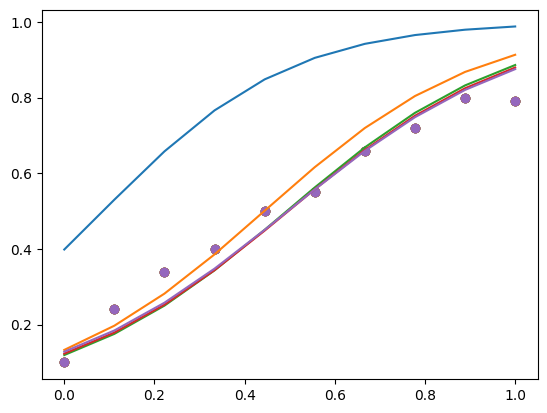

In [30]:
X = np.linspace(0, 1, 10)
Y = [0.1, 0.24, 0.34, 0.4, 0.5, 0.55, 0.66, 0.72, 0.8, 0.79]
lr = 1
neuron2 = Neuron(w=5, b=0.5,learning_rate=lr)
num_epochs = 15
loss_lst = []
for epoch in range(num_epochs):
    epoch_loss = 0
    for x, y in zip(X, Y):
        epoch_loss += neuron2.loss(neuron2.sigmoid(x), y)
        neuron2.back_prop(x, y)
    epoch_loss /= len(X)
    loss_lst.append(epoch_loss)
    print(f'For {epoch} epoch  loss = {epoch_loss}. W={neuron2.w}, b={neuron2.b}')
    if epoch % 3 == 0:
        neuron2.plot_sigmoid(X, Y)

Теперь можно попробовать соединить два нейрона один за другим и посмотреть как они преобразуют сигнал. Надо понять как от нейрона к нейрону передается градиент на веса.

In [31]:
lr = 1
neuron2 = Neuron(w=5, b=3,learning_rate=lr)
neuron1 = Neuron(w=1, b=-1,learning_rate=lr,next_neuron=neuron2)
num_epochs = 10
loss_lst = []
for epoch in range(num_epochs):
    epoch_loss = 0
    for x, y in zip(X, Y):
        epoch_loss += neuron2.loss(neuron1.sigmoid(neuron2.sigmoid(x)), y)
        neuron1.back_prop(x)
        neuron2.back_prop(x, y)
    epoch_loss /= len(X)
    loss_lst.append(epoch_loss)
    print(f'For {epoch} epoch  loss = {epoch_loss}. neuron2 W={neuron2.w}, b={neuron2.b}, neuron1 W={neuron1.w}, b={neuron1.b}')
    # if epoch % 2 == 0:
    #     neuron2.plot_sigmoid(X, Y)


For 0 epoch  loss = 0.05078241118945585. neuron2 W=4.97957271623756, b=2.8330871432889677, neuron1 W=0.9964717356081251, b=-1.019978760320213
For 1 epoch  loss = 0.05097211479054855. neuron2 W=4.955009600412884, b=2.637407838824823, neuron1 W=0.9921111762073475, b=-1.0446685479061042
For 2 epoch  loss = 0.05136876225987878. neuron2 W=4.924476900797081, b=2.4022166151530375, neuron1 W=0.9864962750473157, b=-1.0764453788391757
For 3 epoch  loss = 0.05218202452610086. neuron2 W=4.884758484888972, b=2.1101712430946664, neuron1 W=0.9788373055128783, b=-1.11975081182311
For 4 epoch  loss = 0.053938615853371875. neuron2 W=4.82967181756074, b=1.7316344123696334, neuron1 W=0.9674785154012698, b=-1.1839302001373704
For 5 epoch  loss = 0.05818533395933171. neuron2 W=4.74608388297726, b=1.2140632838838452, neuron1 W=0.948491703583692, b=-1.291667913740046
For 6 epoch  loss = 0.0699579953833946. neuron2 W=4.605447718212711, b=0.47588293719082114, neuron1 W=0.9128883335527312, b=-1.5017002010338303
